In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt



c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Dataset

In [2]:
data = pd.read_csv('LungCapData2.csv')

data.head()

,Age,LungCap,Height,Gender,Smoke
0,9,3.124,57.0,female,no
1,8,3.172,67.5,female,no
2,7,3.160,54.5,female,no
3,9,2.674,53.0,male,no
4,9,3.685,57.0,male,no


In [3]:
data.shape

(654, 5)

There are **654** rows and **5** columns in the dataset 

### Data cleaning

#### Check for null values

In [4]:
data.isnull().sum()

Age        0
LungCap    0
Height     0
Gender     0
Smoke      0
dtype: int64

There is no null/nan values in the dataset

## Descriptive Statistics

#### Central Tendency

- Mean
- Median
- Mode

In [5]:
data.describe() #we can get mean from this

,Age,LungCap,Height
count,654.000000,654.000000,654.000000
mean,9.931193,5.910339,61.143578
std,2.953935,2.601177,5.703513
min,3.000000,0.373000,46.000000
25%,8.000000,3.943000,57.000000
50%,10.000000,5.642500,61.500000
75%,12.000000,7.355500,65.500000
max,19.000000,15.379000,74.000000


In [6]:
## median

data.median()

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_20260\1666824316.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Age        10.0000
LungCap     5.6425
Height     61.5000
dtype: float64

In [7]:
## mode

data.mode()

,Age,LungCap,Height,Gender,Smoke
0,9,7.246,63.0,male,no


#### Variability

- Standard deviation
- Variance

In [8]:
data.var()

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_20260\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Age         8.725733
LungCap     6.766123
Height     32.530058
dtype: float64

#### Summary

Mean:

- Average Age is **9.931193**	
- Average LungCap is **5.910339**
- Average Height is **61.143578**

Median:

- Median of Age is **10.0000**
- Median of LungCap **5.6425**
- Median of Height **61.5000**

Mode:

- The most occuring Age is **9**
- The most occuring LungCap is **7.246**
- The most occuring Height is **63.0**
- The most gender is **Male**
- The most Smoke is **No**

Variance:

- Age : **8.725733**
- LungCap : **6.766123**
- Height : **32.530058**

Standard Deviation:

- Age : **2.953935**		
- LungCap : **2.601177**
- Height : **5.703513**

#### Lets check correlations

In [9]:
data_corr = data.corr()
data_corr

,Age,LungCap,Height
Age,1.000000,0.756459,0.791944
LungCap,0.756459,1.000000,0.868135
Height,0.791944,0.868135,1.000000


Lets plot a headmap of the correlation

<AxesSubplot:>

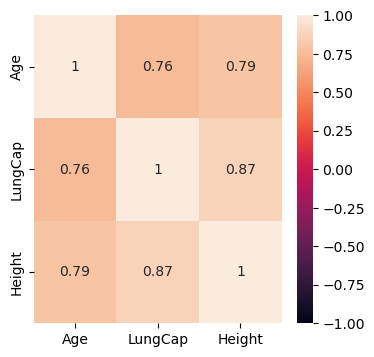

In [10]:
plt.figure(figsize=(4, 4))
sns.heatmap(data_corr, vmin=-1, vmax=+1, annot=True)

#### Normal Distribution

In [11]:
data.dtypes

Age          int64
LungCap    float64
Height     float64
Gender      object
Smoke       object
dtype: object

In [12]:
numerical_features = data.select_dtypes(exclude=[np.object])
numerical_features

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_20260\675694899.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical_features = data.select_dtypes(exclude=[np.object])


,Age,LungCap,Height
0,9,3.124,57.0
1,8,3.172,67.5
2,7,3.160,54.5
3,9,2.674,53.0
4,9,3.685,57.0
...,...,...,...
649,16,10.810,67.0
650,15,9.181,68.0
651,18,6.559,60.0
652,16,6.385,63.0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


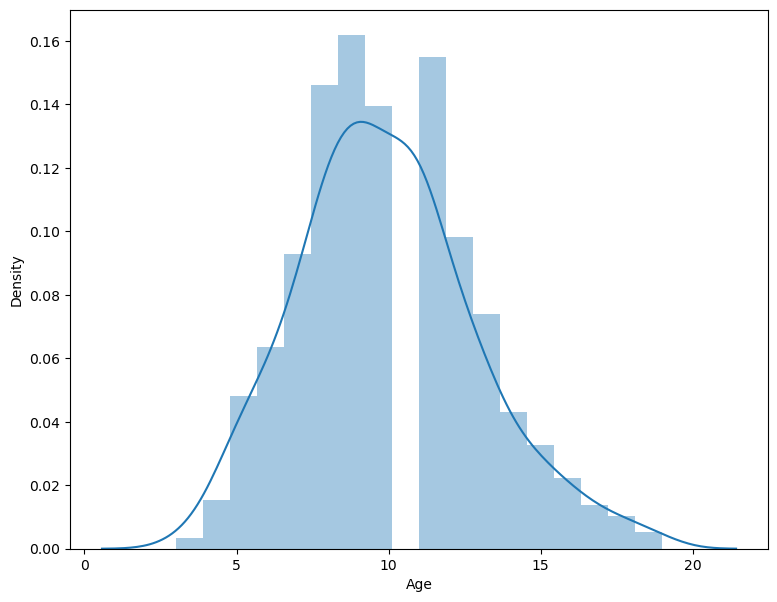

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


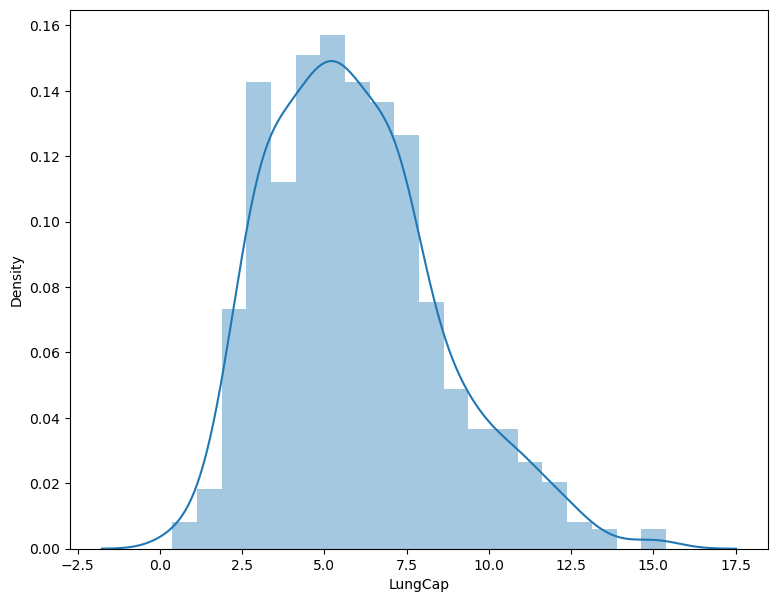

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


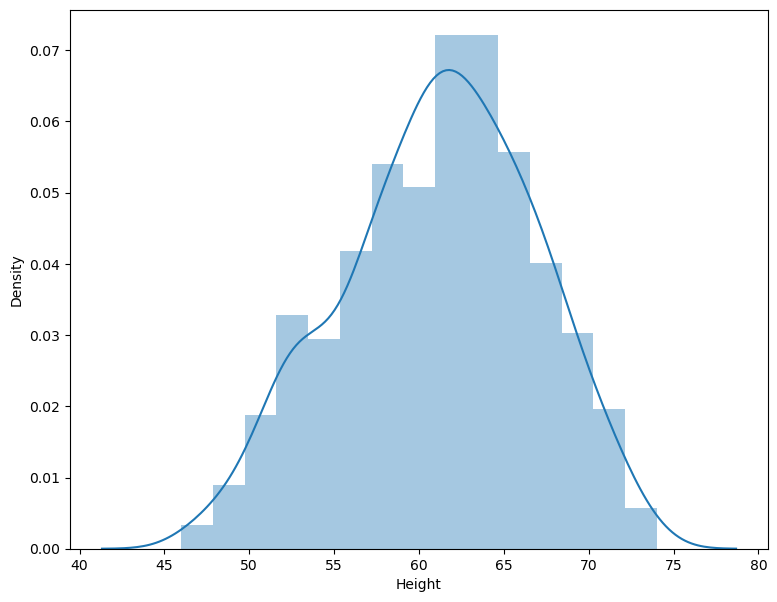

In [15]:
for i in numerical_features.columns:
    plt.figure(figsize= (9, 7))
    sns.distplot(numerical_features[i])
    plt.show()

#### Skewness

In [16]:
print("Skewness:\n", data.select_dtypes(exclude=[np.object]).skew())

Skewness:
 Age        0.413557
LungCap    0.662575
Height    -0.213541
dtype: float64


C:\Users\Timileyin\AppData\Local\Temp\ipykernel_20260\1502345081.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("Skewness:\n", data.select_dtypes(exclude=[np.object]).skew())


#### QQPlot

In [17]:
import statsmodels.api as sm

import scipy.stats as stats

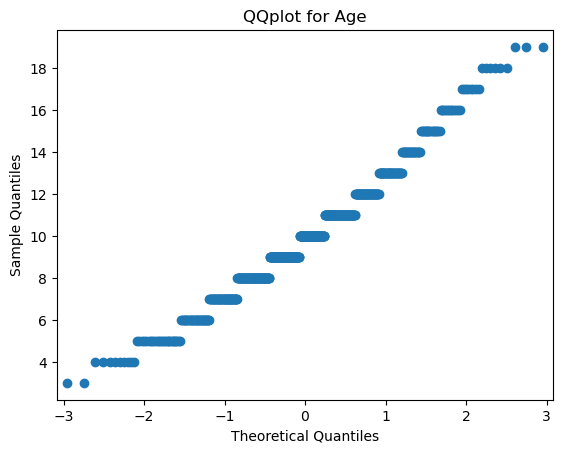

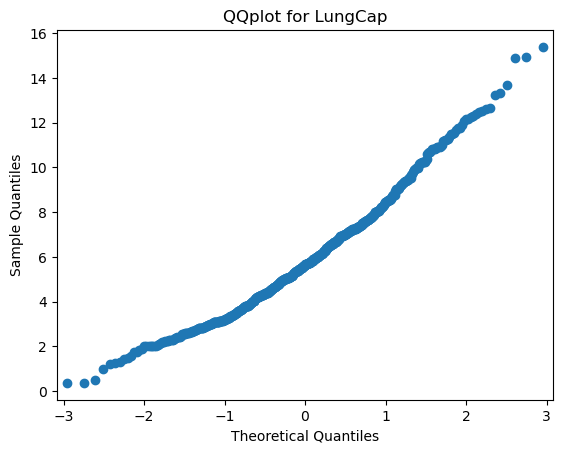

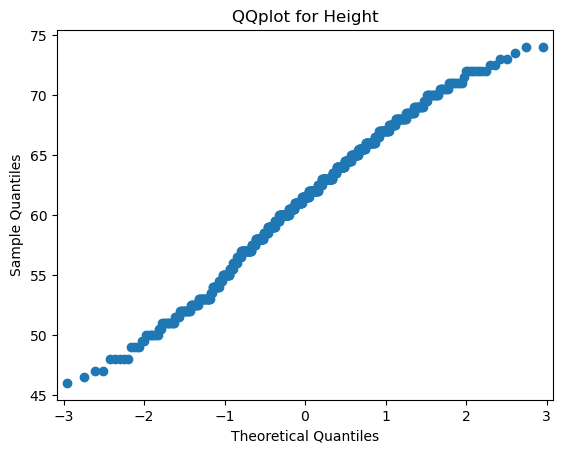

In [18]:
for i in numerical_features.columns:
    sm.qqplot(data[i], dist= stats.norm)
    plt.title("QQplot for {}".format(i))
    plt.show()

#### Model Creation

##### Model 1 LungCap vs Height + error